**Q** **Learning** **Exercise**

In [ ]:
import numpy as np
import pylab as plt
import networkx as nx

# adding the possible coordinates
points = [(-1,-1), (-1,2), (-1,3), (0,0), (0,1), (0,2), (0,3), (1,1), (1,2), 
          (2,-1), (2,1), (2,2), (3,1), (3,2), (3,3)]

#adding the list of edges
edges = [(0, 1), (1, 2), (2, 6), (1, 5), (3, 4), (4,5), 
         (5,6), (0,9), (4,7), (5,8), (7,8), (9,10), (10,11), 
         (7,10), (8,11), (10,12), (11,13), (13,14)]  # (v1,v2)

#defining action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

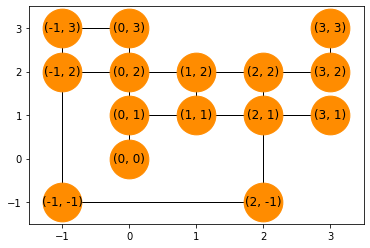

In [ ]:
#plotting the maze
def add_edge_to_graph(G, e1, e2):
    G.add_edge(e1, e2)

G = nx.Graph()

for i in range(len(edges)):
    add_edge_to_graph(G, points[edges[i][0]], points[edges[i][1]])

# pos = nx.spring_layout(G)
pos = {point: point for point in points}

# add axis
fig, ax = plt.subplots()
nx.draw(G, pos=pos, ax=ax)
# draw nodes and edges
nx.draw(G, pos=pos, node_color='darkorange', node_size=1500, ax=ax)  
nx.draw_networkx_labels(G, pos=pos)  # draw node labels/names

plt.axis("on")
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-1.5,3.5)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

**Setting the Coordinate Points**

In [ ]:
#Dimensions of the coordinates matrix 
rows = 5
columns = 5

coordinate_rows = {} 

#defining possible coordinates in each row 
coordinate_rows[0] = [0,3,4]
coordinate_rows[1] = [1,2,3,4]
coordinate_rows[2] = [2,3]
coordinate_rows[3] = [0,2,3]
coordinate_rows[4] = [4]

**R** **Table** 

In [ ]:
R = np.full((rows, columns), -100.)
R[4,2] = 100 #defining reward of 100 for the goal

#set the rewards for all aisle locations
for row_index in range(0, 5):
  for column_index in coordinate_rows[row_index]:
    R[row_index, column_index] = -1.

print("Reward Table: ")
R

Reward Table: 


array([[  -1., -100., -100.,   -1.,   -1.],
       [-100.,   -1.,   -1.,   -1.,   -1.],
       [-100., -100.,   -1.,   -1., -100.],
       [  -1., -100.,   -1.,   -1., -100.],
       [-100., -100.,  100., -100.,   -1.]])

**Q** **Table** 

In [ ]:
#initializing Q table 
Q = np.zeros((rows, columns, 4))

In [ ]:
#function to determine if the specified coordinate exists
def is_terminal_state(current_row_index, current_column_index):
  if R[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

In [ ]:
#function to select a random starting location
def get_starting_location():
  current_row_index = np.random.randint(rows)
  current_column_index = np.random.randint(columns)

  return current_row_index, current_column_index

In [ ]:
#function to choose which action to take next
def get_next_action(current_row_index, current_column_index):
  return np.argmax(Q[current_row_index, current_column_index])

In [ ]:
#function to get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

**Training** 

In [ ]:
learning_rate = 0.9 

#run through 1000 training episodes
for episode in range(1000):

  #get the starting location for this episode randomly
  row_index, column_index = get_starting_location()

  while not is_terminal_state(row_index, column_index):

    #select the next action
    action_index = get_next_action(row_index, column_index)

    #do the selected action and move to the new location
    old_row_index, old_column_index = row_index, column_index 
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    #take the reward of the new state
    reward = R[row_index, column_index]
    old_q_value = Q[old_row_index, old_column_index, action_index]

    difference = reward + (np.max(Q[row_index, column_index])) - old_q_value

    #update the Q-value 
    new_q_value = old_q_value + (learning_rate * difference)
    Q[old_row_index, old_column_index, action_index] = new_q_value

print("Final Q Table:")
Q

Final Q Table:


array([[[-100.8    , -100.     , -100.     , -100.8    ],
        [   0.     ,    0.     ,    0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     ,    0.     ],
        [  -4.5    ,   -5.31   ,   96.     ,  -90.     ],
        [  -5.4    ,   -5.4    ,   -4.68639,   95.     ]],

       [[   0.     ,    0.     ,    0.     ,    0.     ],
        [ -90.     ,   97.     ,  -90.     ,  -90.     ],
        [ -90.     ,   -2.853  ,   98.     ,   -2.6118 ],
        [  -3.68829,   -3.51   ,   -2.79   ,   97.     ],
        [  -4.5    ,   -4.5    ,  -90.     ,   96.     ]],

       [[   0.     ,    0.     ,    0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     ,    0.     ],
        [  -1.8    ,   -2.61   ,   99.     ,  -90.     ],
        [  -1.971  ,  -90.     ,   -1.89   ,   98.     ],
        [   0.     ,    0.     ,    0.     ,    0.     ]],

       [[-100.     , -100.     , -100.     , -100.8    ],
        [   0.     ,    0.     ,    0.     ,    0.     ],
        

**Testing**

In [ ]:
#function to get the shortest path between two locations
def get_shortest_path(start_row_index, start_column_index):
  start_row_index=start_row_index+1
  start_column_index=start_column_index+1
  #point doesn't exist
  if is_terminal_state(start_row_index, start_column_index):
    return []
  #point exists
  else: 
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    action=[]
    shortest_path.append([current_row_index, current_column_index])

    #moving along the coordinate plane until the goal is reached
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index)

      #move to the next selected location
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])

      if action_index==0:
        action.append('up')
      elif action_index==1:
        action.append('left')
      elif action_index==2:
        action.append('right')
      elif action_index==3:
        action.append('down')

    #mapping back to -1 values
    temp=[]
    for i in shortest_path:
      temp.append([i[0]-1,i[1]-1])
    print(action)
    return temp

In [ ]:
print(get_shortest_path(-1,3)) 

['down', 'right', 'down', 'right', 'right', 'right']
[[-1, 3], [-1, 2], [0, 2], [0, 1], [1, 1], [2, 1], [3, 1]]


In [ ]:
print(get_shortest_path(-1,2))

['right', 'down', 'right', 'right', 'right']
[[-1, 2], [0, 2], [0, 1], [1, 1], [2, 1], [3, 1]]


In [ ]:
print(get_shortest_path(0,3))

['down', 'down', 'right', 'right', 'right']
[[0, 3], [0, 2], [0, 1], [1, 1], [2, 1], [3, 1]]


In [ ]:
print(get_shortest_path(0,0))

['left', 'right', 'right', 'right']
[[0, 0], [0, 1], [1, 1], [2, 1], [3, 1]]
